In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Metal device set to: Apple M1


2022-05-24 15:05:22.896325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 15:05:22.896626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-05-24 15:05:23.405574: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-24 15:05:23.480561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for devic

Epoch 1/10
363/363 [==============================] - ETA: 0s - loss: 11650150330007552.0000

2022-05-24 15:05:25.835375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 4ms/step - loss: 11650150330007552.0000 - val_loss: 4617291694080.0000
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 2439742488576.0000 - val_loss: 1079345348608.0000
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 570317602816.0000 - val_loss: 252308652032.0000
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 133317992448.0000 - val_loss: 58980032512.0000
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 31164604416.0000 - val_loss: 13787234304.0000
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 7285071360.0000 - val_loss: 3222920704.0000
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 1702971008.0000 - val_loss: 753394688.0000
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 398089088.0000 - val_loss: 176114192.0000
Epoch 9/10
363/363 [=========================

2022-05-24 15:05:38.216893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


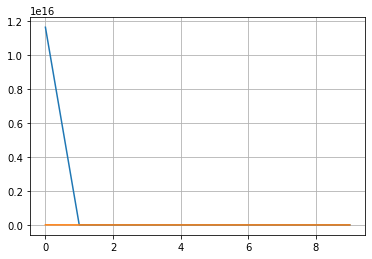

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history2 = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test2 = model.evaluate(X_test_scaled, y_test)
X_new2 = X_test_scaled[:3]
y_pred2 = model.predict(X_new2)

Epoch 1/20
 18/363 [>.............................] - ETA: 1s - loss: 6.8555 

/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-05-24 15:06:58.293595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


355/363 [============================>.] - ETA: 0s - loss: 2.2795

2022-05-24 15:06:59.411336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 1s 4ms/step - loss: 2.2492 - val_loss: 1.3453
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7092 - val_loss: 0.6481
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6234 - val_loss: 0.5943
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5844 - val_loss: 0.5487
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5556 - val_loss: 0.5220
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5305 - val_loss: 0.4938
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5108 - val_loss: 0.4806
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4941 - val_loss: 0.4579
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4805 - val_loss: 0.4437
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4695 - val_loss: 0.4331
Epoch 11/2

2022-05-24 15:07:25.037842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


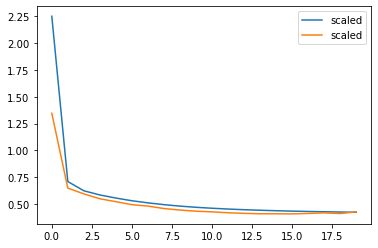

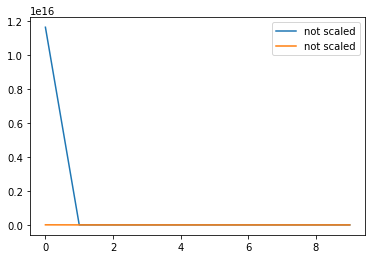

In [9]:
plt.plot(pd.DataFrame(history2.history), label='scaled')
plt.legend()
plt.show()
plt.plot(pd.DataFrame(history.history), label='not scaled')
plt.legend()
plt.show()

# Dane zawsze muszą być przeskalowane